# CNN卷積神經網路
# CNN 很厲害的是圖像辨識

輸入一張圖片(圖片是由一堆數字組成)，經過filter抓取重要的特徵，過程中輸入的圖片矩陣要乘上一個權重，並輸出一個數字，因此會產生出很多的矩陣，CNN會使資料量增大，因為一個filter，所以出現pooling層解決問題：想要把大量資料做簡化，每個filter看每個區塊的強度，所以要max-pooling，劃分選區？ 然後送到fully-connected nn(Dense層)

why?

#convolutional layer
看李鴻毅講解這個
FIlter是學來的權重，對每個3*3的矩陣相乘，產生一個相同大小矩陣
每使用一個Filter會有新的一個大小的矩陣
所以會有很多個矩陣，但這對機器學習來說不好，我們希望我們的輸入維度越小越好，
#max pooling
因為透過convolution layer 產生很多資料，所以透過在一個2*2的維度下去選出最大值當作新的輸入層，送進Dense層


In [ ]:
32*32 Filter(3*3)取32個/          取64個Filter/           取128個Filter /Dense/Softmax/SGD/

初始準備

In [2]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist
import tensorflow as tf
import sys
import pickle

In [4]:
import gzip
f = gzip.open('mnist.pkl.gz', 'rb')
if sys.version_info < (3,):
    data = pickle.load(f)
else:
    data = pickle.load(f, encoding='bytes')
f.close()
(x_train, y_train), (x_test, y_test) = data

輸入格式處理
CNN就是吃圖片的，所以不用將矩陣拉平，¶

In [5]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [6]:
x_train[9487].shape

(28, 28, 1)

In [7]:
X = x_train[9487][:,:,0]

In [8]:
X 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
x_train[9487][:,:,0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
X

In [ ]:
下圖是一張28*28的灰階圖片
也就是說是寬28個pixel與高28pixel的圖片
總畫素就是28*28=784畫素 越多pixel解析度越高
像素密就是每平方英吋，有多少個像素
同樣的解析度，尺寸越大則像素密度越小
影像是由高*寬組成

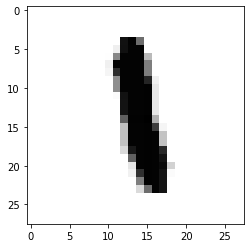

In [10]:
plt.imshow(X,cmap='Greys')

In [ ]:
輸出格式整理¶

In [ ]:
from keras.utils import np_utils

In [ ]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
打造CNN
3.1決定神經網路架構，讀入相關套件¶

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras.optimizers import SGD


In [ ]:
建構神經網路

In [ ]:
model = Sequential()

In [ ]:
32是filter的個數，filter大小3*3
input_shape 是28*28且是1個channel

In [ ]:
model.add(Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))

In [ ]:
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))

In [ ]:
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))

In [ ]:
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [ ]:
model.add(Dense(10))
model.add(Activation('softmax'))

compile¶

In [ ]:
model.compile(loss='mse',optimizer=SGD(lr=0.05),metrics=['accuracy'])

In [ ]:
#檢視
model.summary()

In [ ]:
(3*3+1)*32

In [ ]:
#train
model.fit(x_train,y_train,batch_size=100,epochs=12)

In [ ]:
#result
score = model.evaluate(x_test,y_test)

In [ ]:
print('loss:',score[0])